### Problem Statement: Concrete Strength Prediction

Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

Name -- Data Type -- Measurement -- Description <br>
 Cement (cement) -- quantitative -- kg in a m3 mixture -- Input  <br>
 Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input <br>
 Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input <br>
 Water (water) -- quantitative -- kg in a m3 mixture -- Input <br>
 Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input <br>
 Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input <br>
 Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input<br>
 Age(age) -- quantitative -- Day (1~365) -- Input Variable<br>
 Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

## Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers (10 Marks)

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
pdata = pd.read_csv("concrete.csv")

In [3]:
pdata.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29
5,255.00,0.00,0.00,192.00,0.00,889.80,945.00,90,21.86
6,166.80,250.20,0.00,203.50,0.00,975.60,692.60,7,15.75
7,251.40,0.00,118.30,188.50,6.40,"1,028.40",757.70,56,36.64
8,296.00,0.00,0.00,192.00,0.00,"1,085.00",765.00,28,21.65
9,155.00,184.00,143.00,194.00,9.00,880.00,699.00,28,28.99


In [4]:
pdata.shape # Check number of columns and rows in data frame

(1030, 9)

In [5]:
pdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


In [6]:
pdata.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
pdata.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
pdata.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [9]:
pdata.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [10]:
pdata.isnull().sum()# If there are any null values in data set

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

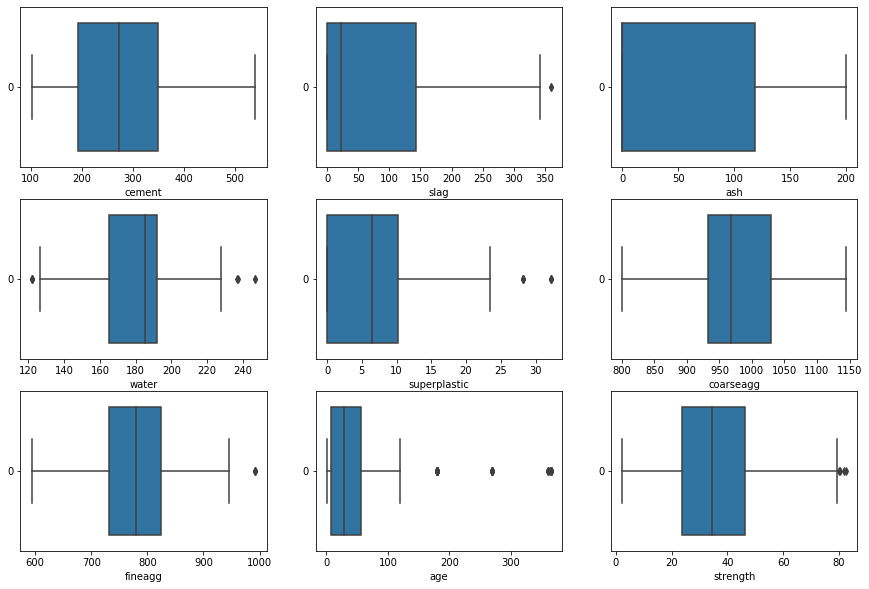

In [11]:
#### LEts plot the box for each
plt.figure(figsize=(15,10))
pos = 1
for column in pdata.select_dtypes(include=[np.number]):
    plt.subplot(3, 3, pos)
    box_plot = sns.boxplot(data=pdata[column], orient="h")
    box_plot.set(xlabel=column)
    pos += 1

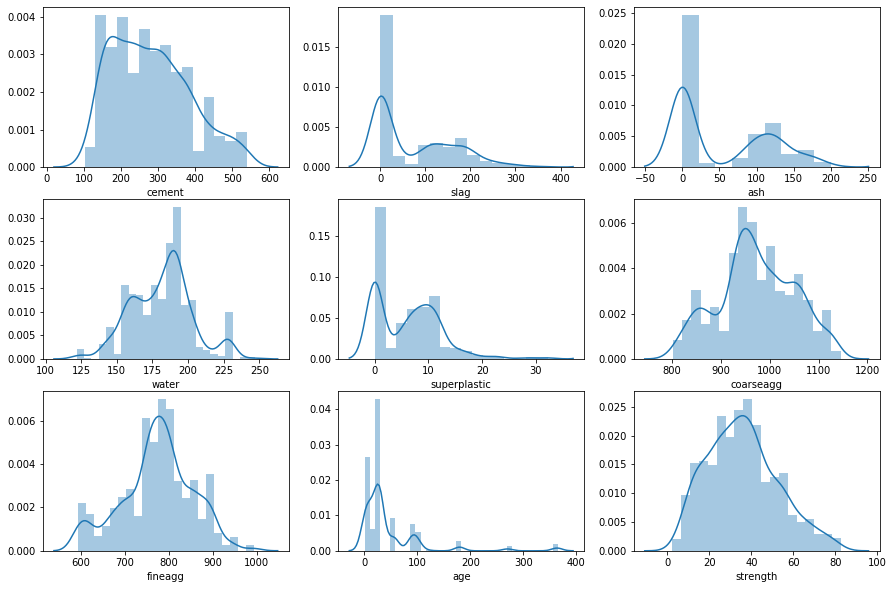

In [12]:
#### LEts check distro for each
plt.figure(figsize=(15,10))
pos = 1
for column in pdata.select_dtypes(include=[np.number]):
    plt.subplot(3, 3, pos)
    dist_plot=sns.distplot(pdata[column])
    dist_plot.set(xlabel=column)
    pos += 1

0.00     45.73
189.00    2.91
106.30    1.94
24.00     1.36
20.00     1.17
145.00    1.07
19.00     0.97
98.10     0.97
22.00     0.78
26.00     0.78
116.00    0.68
190.00    0.68
132.40    0.58
236.00    0.58
237.50    0.58
47.50     0.58
95.00     0.58
97.10     0.58
209.40    0.58
203.50    0.58
142.50    0.58
177.00    0.49
153.00    0.49
50.10     0.49
133.00    0.49
42.20     0.49
93.40     0.49
13.60     0.49
129.90    0.49
42.10     0.49
          ... 
116.80    0.10
139.90    0.10
17.20     0.10
169.00    0.10
17.60     0.10
163.00    0.10
237.00    0.10
114.60    0.10
105.10    0.10
190.10    0.10
91.70     0.10
169.40    0.10
259.70    0.10
243.00    0.10
139.00    0.10
164.20    0.10
167.00    0.10
100.50    0.10
117.60    0.10
238.70    0.10
178.10    0.10
148.90    0.10
98.80     0.10
163.90    0.10
128.90    0.10
161.00    0.10
160.50    0.10
129.00    0.10
100.60    0.10
209.00    0.10
Name: slag, Length: 185, dtype: float64



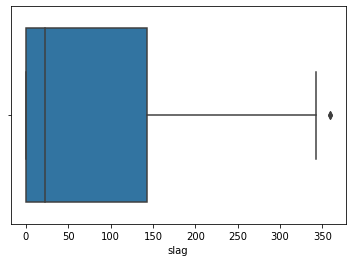

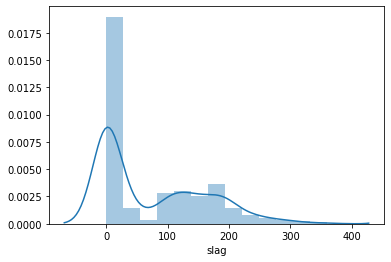

In [13]:
print(pdata['slag'].value_counts(normalize=True)*100)
print()
sns.boxplot(pdata['slag'])
plt.show()
sns.distplot(pdata['slag'])
plt.show()

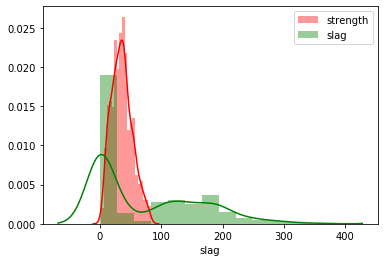

In [14]:
#plt.figure(figsize=(15,15))
sns.distplot(pdata['strength'],color='r',label='strength')
sns.distplot(pdata['slag'],color='g',label='slag')
plt.legend()
plt.show()

In [15]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Readme.txt
#This document says that there are no missing attributes. 
#Summary Statistics: 

#Number of instances (observations): 1030
#Number of Attributes: 9
#Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
#Missing Attribute Values: None

# SO ASSUMING ZERO IS A VALID VALUE #

#slag is a critical components that adds strength to concrete. (google.com)
#so will assume that the values ZERO (45.7%) are missing at ramdom.
# replacing them with MEDIAN
#pdata[['slag']] = pdata[['slag']].replace(0, np.nan)
#pdata['slag'] = pdata['slag'].fillna(pdata['slag'].median())

In [16]:
#pdata.describe().transpose()

0.00     54.95
118.30    1.94
141.00    1.55
24.50     1.46
79.00     1.36
94.00     1.26
100.40    1.07
100.50    0.97
98.80     0.97
174.20    0.97
125.20    0.97
167.00    0.97
95.70     0.97
121.60    0.97
123.00    0.78
132.00    0.78
113.00    0.78
107.00    0.68
122.00    0.58
121.90    0.49
97.40     0.49
125.40    0.49
124.10    0.49
94.10     0.49
96.20     0.49
121.40    0.49
173.50    0.49
128.60    0.49
123.80    0.49
96.70     0.49
          ... 
133.60    0.10
137.90    0.10
71.00     0.10
187.00    0.10
127.90    0.10
148.10    0.10
160.90    0.10
200.10    0.10
174.90    0.10
90.30     0.10
127.70    0.10
112.60    0.10
99.60     0.10
146.40    0.10
138.00    0.10
133.00    0.10
89.00     0.10
107.50    0.10
146.00    0.10
190.00    0.10
139.00    0.10
194.00    0.10
87.00     0.10
142.00    0.10
111.00    0.10
119.00    0.10
134.00    0.10
95.00     0.10
130.00    0.10
129.70    0.10
Name: ash, Length: 156, dtype: float64



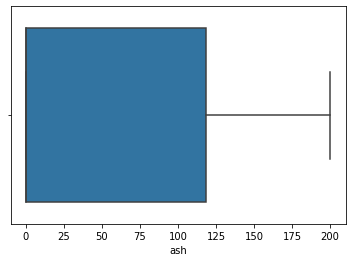

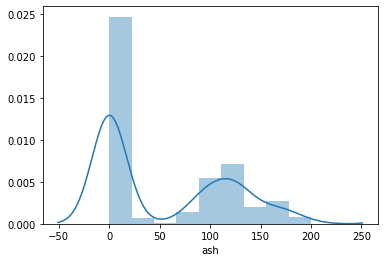

In [17]:
print(pdata['ash'].value_counts(normalize=True)*100)
print()
sns.boxplot(pdata['ash'])
plt.show()
sns.distplot(pdata['ash'])
plt.show()

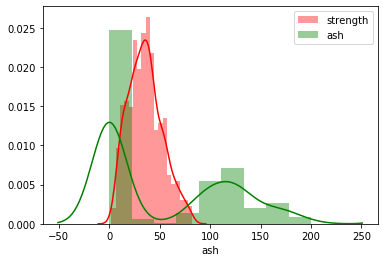

In [18]:
#plt.figure(figsize=(15,15))
sns.distplot(pdata['strength'],color='r',label='strength')
sns.distplot(pdata['ash'],color='g',label='ash')
plt.legend()
plt.show()

In [19]:
#ash is a critical components that adds strength to concrete. (google.com)
#so will assume that the values ZERO (54.95%) are missing at ramdom.
# replacing them with MEDIAN
#pdata[['ash']] = pdata[['ash']].replace(0, np.nan)
#pdata['ash'] = pdata['ash'].fillna(pdata['ash'].median())

In [20]:
#sns.distplot(pdata['ash'])
#plt.show()

In [21]:
#pdata.describe().transpose()

0.00    36.80
11.60    3.59
8.00     2.62
7.00     1.84
6.00     1.65
9.00     1.55
8.90     1.55
7.80     1.55
9.90     1.55
10.00    1.46
16.50    1.46
11.00    1.36
9.50     1.26
5.70     1.17
5.50     1.07
7.50     1.07
5.80     1.07
4.60     1.07
6.70     1.07
11.70    1.07
4.50     0.97
11.20    0.97
10.40    0.97
12.00    0.87
10.90    0.87
14.30    0.87
11.30    0.78
3.90     0.78
10.10    0.68
6.10     0.68
         ... 
16.10    0.10
12.30    0.10
6.20     0.10
12.70    0.10
4.00     0.10
15.60    0.10
7.20     0.10
8.80     0.10
22.10    0.10
19.00    0.10
2.00     0.10
20.00    0.10
18.30    0.10
8.40     0.10
20.80    0.10
18.80    0.10
7.40     0.10
1.90     0.10
7.10     0.10
6.60     0.10
3.10     0.10
10.70    0.10
15.30    0.10
13.10    0.10
10.60    0.10
2.20     0.10
11.50    0.10
6.30     0.10
10.50    0.10
9.80     0.10
Name: superplastic, Length: 111, dtype: float64



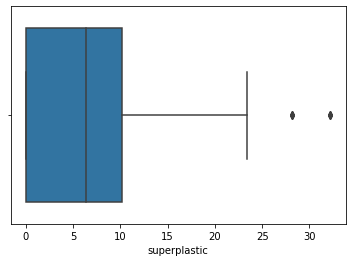

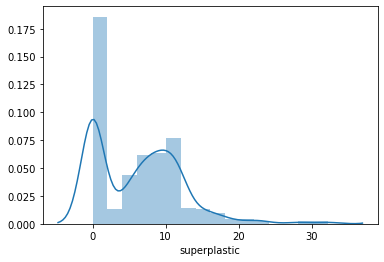

In [22]:
print(pdata['superplastic'].value_counts(normalize=True)*100)
print()
sns.boxplot(pdata['superplastic'])
plt.show()
sns.distplot(pdata['superplastic'])
plt.show()

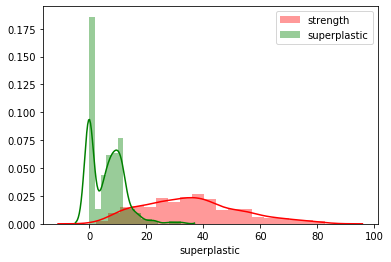

In [23]:
#plt.figure(figsize=(15,15))
sns.distplot(pdata['strength'],color='r',label='strength')
sns.distplot(pdata['superplastic'],color='g',label='superplastic')
plt.legend()
plt.show()

In [24]:
#superplastic is a critical components that adds strength to concrete. (google.com)
#so will assume that the values ZERO (36.7%) are missing at ramdom.
# replacing them with MEDIAN
#pdata[['superplastic']] = pdata[['superplastic']].replace(0, np.nan)
#pdata['superplastic'] = pdata['superplastic'].fillna(pdata['superplastic'].median())

In [25]:
#sns.distplot(pdata['superplastic'])
#plt.show()

In [26]:
#pdata.describe().transpose()

In [27]:
pdata.shape

(1030, 9)

## 2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)

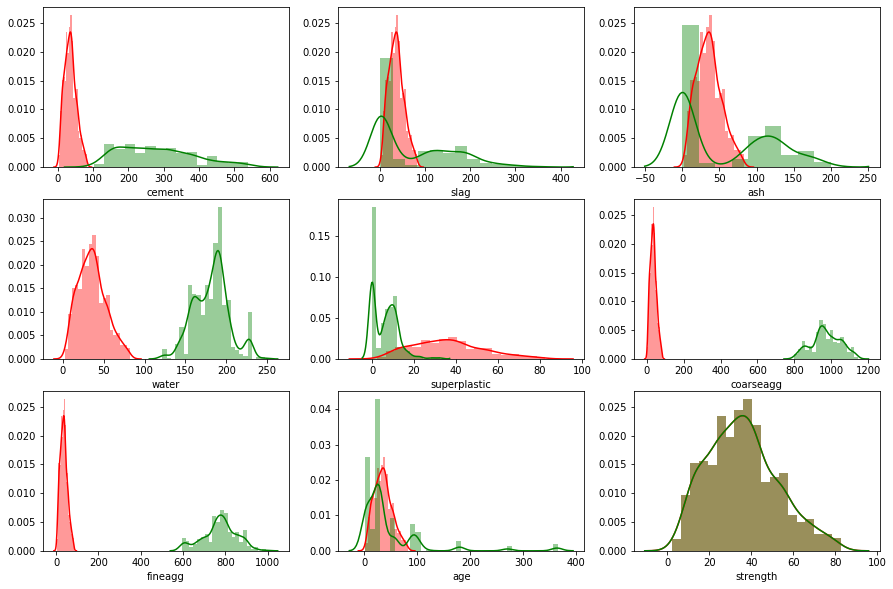

In [28]:
#### LEts check bi-variant for each
plt.figure(figsize=(15,10))
pos = 1
for column in pdata.select_dtypes(include=[np.number]):
    plt.subplot(3, 3, pos)
    sns.distplot(pdata['strength'],color='r',label='strength')
    sns.distplot(pdata[column],color='g',label=pdata[column])
    pos += 1

In [29]:
# the visualization of the data is squeued due to outliers and scale. 
# Standardizing the data to visualize on the same scale and identify correlation.

#pdata = pd.read_csv("concrete.csv")
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

pdata_sclaed_fields = pdata

scaler = StandardScaler()
scaled_pdata = scaler.fit_transform(pdata_sclaed_fields)
scaled_pdata = pd.DataFrame(scaled_pdata, columns=pdata.columns)

pdata = scaled_pdata
pdata.head(10)
#pdata.drop(["age","balance","duration","campaign"],axis=1,inplace=True)

#pdata = pd.merge(pdata,scaled_pdata, left_index=True, right_index=True)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.34,1.60,-0.85,1.03,-1.04,-0.01,-0.31,-0.28,-0.36
1,-1.07,-0.37,1.10,-1.09,0.77,1.39,0.28,-0.50,-0.74
2,-0.30,-0.86,0.65,0.27,-0.12,-0.21,1.09,-0.28,-0.40
3,-0.15,0.47,-0.85,2.18,-1.04,-0.53,-1.29,-0.28,0.60
4,-1.21,1.27,-0.85,0.55,0.48,0.96,-0.96,-0.28,-1.05
5,-0.25,-0.86,-0.85,0.49,-1.04,-1.07,2.14,0.70,-0.84
6,-1.09,2.04,-0.85,1.03,-1.04,0.03,-1.01,-0.61,-1.20
7,-0.28,-0.86,1.00,0.32,0.03,0.71,-0.20,0.16,0.05
8,0.14,-0.86,-0.85,0.49,-1.04,1.44,-0.11,-0.28,-0.85
9,-1.21,1.28,1.39,0.58,0.47,-1.20,-0.93,-0.28,-0.41


In [30]:
pdata.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age             float64
strength        float64
dtype: object

In [31]:
pdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",-0.00,1.00,-1.72,-0.85,-0.08,0.66,2.48
slag,"1,030.00",0.00,1.00,-0.86,-0.86,-0.60,0.80,3.31
ash,"1,030.00",0.00,1.00,-0.85,-0.85,-0.85,1.00,2.28
water,"1,030.00",-0.00,1.00,-2.80,-0.78,0.16,0.49,3.07
superplastic,"1,030.00",0.00,1.00,-1.04,-1.04,0.03,0.67,4.35
coarseagg,"1,030.00",0.00,1.00,-2.21,-0.53,-0.06,0.73,2.21
fineagg,"1,030.00",0.00,1.00,-2.24,-0.53,0.07,0.63,2.73
age,"1,030.00",0.00,1.00,-0.71,-0.61,-0.28,0.16,5.06
strength,"1,030.00",-0.00,1.00,-2.01,-0.73,-0.08,0.62,2.80


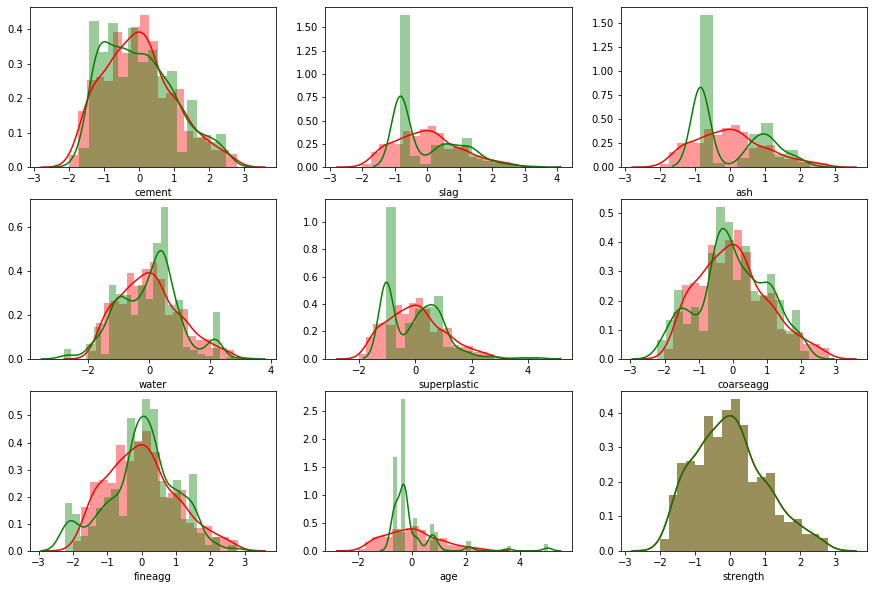

In [32]:
#### LEts check bi-variant for each
plt.figure(figsize=(15,10))
pos = 1
for column in pdata.select_dtypes(include=[np.number]):
    plt.subplot(3, 3, pos)
    sns.distplot(pdata['strength'],color='r',label='strength')
    sns.distplot(pdata[column],color='g',label=pdata[column])
    pos += 1

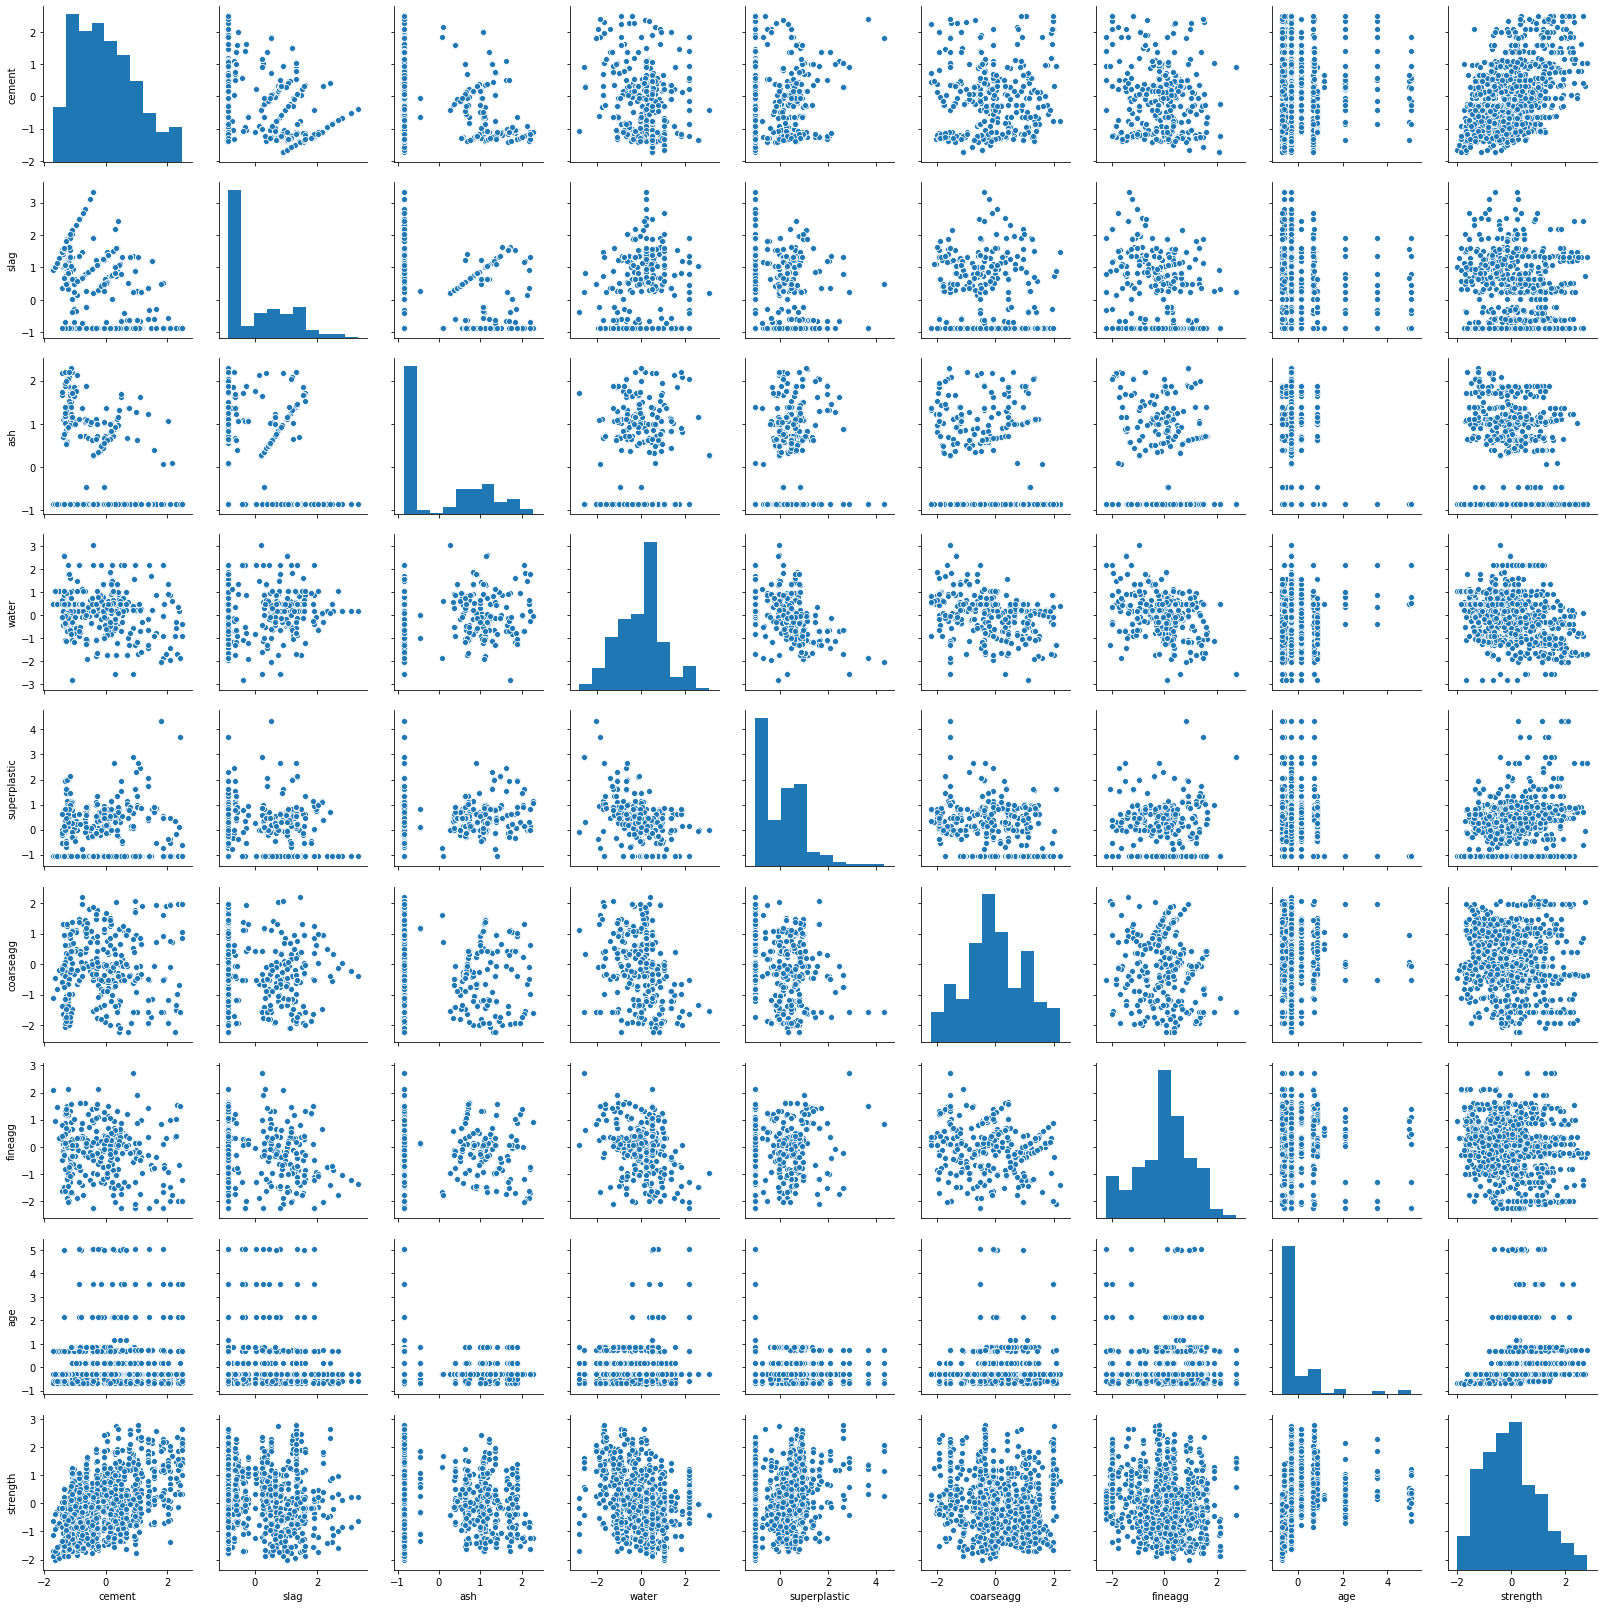

In [33]:
#sns.pairplot(pdata,diag_kind='kde')
#sns.pairplot(pdata[['age','default','balance','housing','loan','duration','campaign','Target']])
sns.pairplot(pdata, palette="husl")

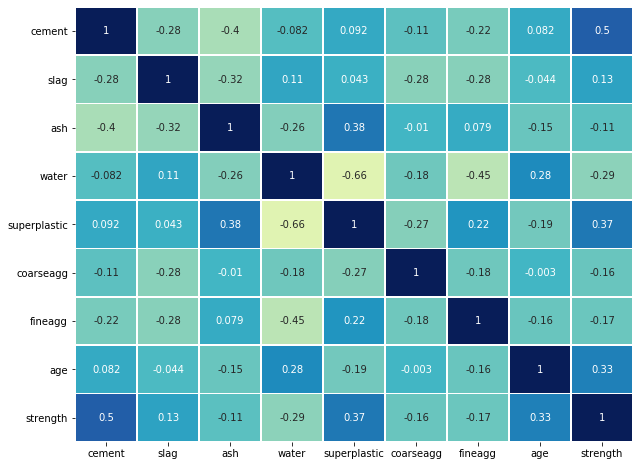

In [34]:
plt.figure(figsize=(10,8))

sns.heatmap(pdata.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [ ]:
# Comments: The cement feature has the highest correlation to strength
# superplastic and age have the 2nd and 3rd most correlation to strength
# water have the hisgest negative coorelation to strength

## Feature Engineering techniques (10 marks) 
a. Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)<br>
b. Get data model ready and do a train test split.<br>
c. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.<br>

In [35]:
from sklearn.model_selection import train_test_split

X = pdata.drop('strength',axis=1)     # Predictor feature columns
Y = pdata['strength']   # Predicted

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_test.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
339,-0.43,0.96,-0.85,0.49,-1.04,-0.00,-0.31,0.70
244,1.07,-0.86,-0.85,0.49,-1.04,-0.42,-0.19,0.70
882,-0.65,-0.86,1.88,-1.26,0.92,1.02,0.02,-0.50
567,-1.21,1.27,-0.85,0.54,0.47,0.95,-0.96,-0.28
923,0.28,-0.86,-0.85,0.49,-1.04,-0.04,0.95,-0.61


Lets check split of data

In [36]:
#y_test.head()

In [37]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using LR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using LR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_LR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_LR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using LR: 0.6031487540630229
Performance on testing data using LR: 0.6339136715208276
Accuracy DT:  0.6339136715208276
MSE:  0.38214294489585093


In [40]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(3)
xpol_train = polynomial_features.fit_transform(x_train)
xpol_test = polynomial_features.fit_transform(x_test)
model = LinearRegression()
model.fit(xpol_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_poly_pred = model.predict(xpol_test)
# performance on train data
print('Performance on training data using PolyLR:',model.score(xpol_train,y_train))
# performance on test data
print('Performance on testing data using PolyLR:',model.score(xpol_test,y_test))
#Evaluate the model using accuracy
acc_PLR=metrics.r2_score(y_test, y_poly_pred)
print('Accuracy DT: ',acc_PLR)
print('MSE: ',metrics.mean_squared_error(y_test, y_poly_pred))

#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Linear Reg: Poly Features'], 'Training Accuracy':[round(model.score(xpol_train,y_train),3)], 'Testing Accuracy':[round(model.score(xpol_test,y_test),3)], 'R2 score': [acc_PLR], 'Avg CrossVal R2 Score':['NaN']},index={'0'})
#results = pd.concat([results, tempResultsDf])
#results = results[['Method', 'Training Accuracy', 'Testing Accuracy', 'accuracy']]
results

Performance on training data using PolyLR: 0.931149773364625
Performance on testing data using PolyLR: 0.8698207817203711
Accuracy DT:  0.8698207817203711
MSE:  0.1358889037027981


,Method,Training Accuracy,Testing Accuracy,R2 score,Avg CrossVal R2 Score
0,Linear Reg: Poly Features,0.93,0.87,0.87,NaN


In [42]:
#Simple linear model has low training and test accuracy.
#Using Polynomial function of degree 3 improves the model score.

##  Creating the model 
1. Algorithms that you think will be suitable for this project (at least 3 algorithms). Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks)

In [43]:
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor)
from sklearn.svm import SVR
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

<b>SVM Model </b>

In [44]:
model=svm.SVR()
model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using SVR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_SVR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_SVR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

num_folds = 20
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
kf_result = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
print(kf_result)
print("Accuracy: %.3f%% (%.3f%%)" % (kf_result.mean()*100.0, kf_result.std()*100.0))

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR: Support Vector'], 'Training Accuracy':[round(model.score(x_train,y_train),3)], 'Testing Accuracy':[round(model.score(x_test,y_test),3)], 'R2 score': [acc_SVR], 'Avg CrossVal R2 Score':[kf_result.mean()]},index={'1'})
results = pd.concat([results, tempResultsDf])
#results = results[['Method', 'Training Accuracy', 'Testing Accuracy', 'accuracy']]
results

Performance on training data using SVR: 0.8779667851765274
Performance on testing data using SVR: 0.8294475793675959
Accuracy DT:  0.8294475793675959
MSE:  0.17803288243606388
[0.78332454 0.86014323 0.80539447 0.85061547 0.90802531 0.87009537
 0.76780702 0.88963567 0.86876655 0.74294992 0.86600111 0.88189357
 0.90145267 0.85738611 0.85778682 0.85945306 0.83010103 0.82808701
 0.80404768 0.85765861]
Accuracy: 84.453% (4.302%)


,Method,Training Accuracy,Testing Accuracy,R2 score,Avg CrossVal R2 Score
0,Linear Reg: Poly Features,0.93,0.87,0.87,NaN
1,SVR: Support Vector,0.88,0.83,0.83,0.84


<b>Gradient Boost Model </b>

In [46]:
model=GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using GBR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
kf_result = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
print(kf_result)
print("Accuracy: %.3f%% (%.3f%%)" % (kf_result.mean()*100.0, kf_result.std()*100.0))

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['GBR: Gradient Boost'], 'Training Accuracy':[round(model.score(x_train,y_train),3)], 'Testing Accuracy':[round(model.score(x_test,y_test),3)], 'R2 score': [acc_GBR], 'Avg CrossVal R2 Score':[kf_result.mean()]}, index={'2'})
results = pd.concat([results, tempResultsDf])
#results = results[['Method', 'Training Accuracy', 'Testing Accuracy', 'accuracy']]
results

Performance on training data using GBR: 0.9503239654196514
Performance on testing data using GBR: 0.9034336873372899
Accuracy DT:  0.9034336873372899
MSE:  0.10080172961378694
[0.89174502 0.88724812 0.93715835 0.8880615  0.87236661 0.92390978
 0.92614167 0.92135168 0.90236373 0.90880979]
Accuracy: 90.592% (1.990%)


,Method,Training Accuracy,Testing Accuracy,R2 score,Avg CrossVal R2 Score
0,Linear Reg: Poly Features,0.93,0.87,0.87,NaN
1,SVR: Support Vector,0.88,0.83,0.83,0.84
2,GBR: Gradient Boost,0.95,0.90,0.90,0.91


<b>Random Forest Model </b>

In [48]:
model=RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using RFR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

num_folds = 21
seed = 2

kfold = KFold(n_splits=num_folds, random_state=seed)
kf_result = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
print(kf_result)
print("Accuracy: %.3f%% (%.3f%%)" % (kf_result.mean()*100.0, kf_result.std()*100.0))

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['RFR: RandonForest'], 'Training Accuracy':[round(model.score(x_train,y_train),3)], 'Testing Accuracy':[round(model.score(x_test,y_test),3)], 'R2 score': [acc_RFR], 'Avg CrossVal R2 Score':[kf_result.mean()]},index={'3'})
results = pd.concat([results, tempResultsDf])
#results = results[['Method', 'Training Accuracy', 'Testing Accuracy', 'accuracy']]
results

Performance on training data using RFR: 0.9765221864433111
Performance on testing data using RFR: 0.8949451469875028
Accuracy DT:  0.8949451469875029
MSE:  0.10966257896757371
[0.88815607 0.83440117 0.87515736 0.87127265 0.95588569 0.95037108
 0.89846537 0.9196798  0.93183554 0.90430895 0.83740712 0.90134423
 0.94009037 0.91454005 0.911033   0.93506806 0.88768152 0.9119425
 0.92811728 0.92590094 0.94558474]
Accuracy: 90.801% (3.276%)


,Method,Training Accuracy,Testing Accuracy,R2 score,Avg CrossVal R2 Score
0,Linear Reg: Poly Features,0.93,0.87,0.87,NaN
1,SVR: Support Vector,0.88,0.83,0.83,0.84
2,GBR: Gradient Boost,0.95,0.90,0.90,0.91
3,RFR: RandonForest,0.98,0.90,0.89,0.91


<b>Adaboost Boost Model </b>

In [50]:
model=AdaBoostRegressor()
model.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [51]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using GBR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

num_folds = 20
seed = 2

kfold = KFold(n_splits=num_folds, random_state=seed)
kf_result = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
print(kf_result)
print("Accuracy: %.3f%% (%.3f%%)" % (kf_result.mean()*100.0, kf_result.std()*100.0))

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['ABR: AdaBoost'], 'Training Accuracy':[round(model.score(x_train,y_train),3)], 'Testing Accuracy':[round(model.score(x_test,y_test),3)], 'R2 score': [acc_ABR], 'Avg CrossVal R2 Score':[kf_result.mean()]},index={'4'})
results = pd.concat([results, tempResultsDf])
#results = results[['Method', 'Training Accuracy', 'Testing Accuracy', 'accuracy']]
results

Performance on training data using GBR: 0.8229405832770966
Performance on testing data using GBR: 0.7661173792600331
Accuracy DT:  0.7661173792600331
MSE:  0.24414075723839876
[0.76387678 0.79345774 0.7152482  0.80843884 0.84177614 0.82806099
 0.75525301 0.77327677 0.84034032 0.75658936 0.84787929 0.80751666
 0.72881804 0.76106516 0.79355675 0.69213891 0.78322951 0.81453336
 0.81916719 0.77167589]
Accuracy: 78.479% (4.184%)


,Method,Training Accuracy,Testing Accuracy,R2 score,Avg CrossVal R2 Score
0,Linear Reg: Poly Features,0.93,0.87,0.87,NaN
1,SVR: Support Vector,0.88,0.83,0.83,0.84
2,GBR: Gradient Boost,0.95,0.90,0.90,0.91
3,RFR: RandonForest,0.98,0.90,0.89,0.91
4,ABR: AdaBoost,0.82,0.77,0.77,0.78


In [52]:
model=KNeighborsRegressor(n_neighbors=2)
model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [53]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using KNR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using KNR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_KNR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_KNR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
kf_result = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
print(kf_result)
print("Accuracy: %.3f%% (%.3f%%)" % (kf_result.mean()*100.0, kf_result.std()*100.0))

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNR'], 'Training Accuracy':[round(model.score(x_train,y_train),3)], 'Testing Accuracy':[round(model.score(x_test,y_test),3)], 'R2 score': [acc_KNR], 'Avg CrossVal R2 Score':[kf_result.mean()]},index={'5'})
results = pd.concat([results, tempResultsDf])
#results = results[['Method', 'Training Accuracy', 'Testing Accuracy', 'accuracy']]
results

Performance on training data using KNR: 0.9004579416759092
Performance on testing data using KNR: 0.7394495345726777
Accuracy DT:  0.7394495345726777
MSE:  0.27197825869655806
[0.64449027 0.66156795 0.75568926 0.60907154 0.72807656 0.77218024
 0.68994943 0.75111561 0.72360451 0.66524254]
Accuracy: 70.010% (5.139%)


,Method,Training Accuracy,Testing Accuracy,R2 score,Avg CrossVal R2 Score
0,Linear Reg: Poly Features,0.93,0.87,0.87,NaN
1,SVR: Support Vector,0.88,0.83,0.83,0.84
2,GBR: Gradient Boost,0.95,0.90,0.90,0.91
3,RFR: RandonForest,0.98,0.90,0.89,0.91
4,ABR: AdaBoost,0.82,0.77,0.77,0.78
5,KNR,0.90,0.74,0.74,0.70


# Tuning the model
Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [54]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits

<b>Tuning SVR
    
    SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
#pipe_svr = Pipeline([#('scl', StandardScaler()), ('pca', PCA()), ('svc', SVR())]) 
#param_grid = {'pca__n_components':[4,5],'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel':['rbf','poly']} 

pipe_svr = Pipeline([('pca', PCA()), ('svc', SVR())]) 
param_grid = {'pca__n_components':[6,7,8],
              'svc__C': [0.1, 1, 10, 100], 
              'svc__gamma': [0.01, 0.1, 1]} 
grid = GridSearchCV( pipe_svr , param_grid = param_grid, scoring='r2', cv=5) 
grid.fit( x_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Train set accuracy: {:.2f}". format( grid.score( x_train, y_train)))
print(" Test set accuracy: {:.2f}". format( grid.score( x_test, y_test)))

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR-GridSearchCV'], 'Training Accuracy':[grid.score(x_train,y_train)], 'Testing Accuracy':[grid.score(x_test,y_test)], 'R2 score': [grid.best_score_], 'Avg CrossVal R2 Score':['NaN']},index={'11'})
results = pd.concat([results, tempResultsDf])
#results = results[['Method', 'Training Accuracy', 'Testing Accuracy', 'accuracy']]
results

 Best cross-validation accuracy: 0.86
 Best parameters:  {'pca__n_components': 8, 'svc__C': 10, 'svc__gamma': 0.1}
 Train set accuracy: 0.93
 Test set accuracy: 0.87


,Method,Training Accuracy,Testing Accuracy,R2 score,Avg CrossVal R2 Score
0,Linear Reg: Poly Features,0.93,0.87,0.87,NaN
1,SVR: Support Vector,0.88,0.83,0.83,0.84
2,GBR: Gradient Boost,0.95,0.90,0.90,0.91
3,RFR: RandonForest,0.98,0.90,0.89,0.91
4,ABR: AdaBoost,0.82,0.77,0.77,0.78
5,KNR,0.90,0.74,0.74,0.70
11,SVR-GridSearchCV,0.93,0.87,0.86,NaN


<b>Tuning RFR
    
    RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
# build a regressor
clf = RandomForestRegressor(n_estimators=15)

# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(10, 100),
              "max_features": ['auto', 'sqrt', 'log2'],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}

# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples, cv=5) #default cv = 3

randomCV.fit( x_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Train set accuracy: {:.2f}". format( randomCV.score( x_train, y_train)))
print(" Test set accuracy: {:.2f}". format( randomCV.score( x_test, y_test)))

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['RFR-RandomSearchCV'], 'Training Accuracy':[randomCV.score(x_train,y_train)], 'Testing Accuracy':[randomCV.score(x_test,y_test)], 'R2 score': [randomCV.best_score_], 'Avg CrossVal R2 Score':['NaN']},index={'31'})
results = pd.concat([results, tempResultsDf])
#results = results[['Method', 'Training Accuracy', 'Testing Accuracy', 'accuracy']]
results
 
#print(randomCV.best_params_)

 Best cross-validation accuracy: 0.86
 Best parameters:  {'bootstrap': False, 'max_depth': 59, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 6}
 Train set accuracy: 0.95
 Test set accuracy: 0.87


,Method,Training Accuracy,Testing Accuracy,R2 score,Avg CrossVal R2 Score
0,Linear Reg: Poly Features,0.93,0.87,0.87,NaN
1,SVR: Support Vector,0.88,0.83,0.83,0.84
2,GBR: Gradient Boost,0.95,0.90,0.90,0.91
3,RFR: RandonForest,0.98,0.90,0.89,0.91
4,ABR: AdaBoost,0.82,0.77,0.77,0.78
5,KNR,0.90,0.74,0.74,0.70
11,SVR-GridSearchCV,0.93,0.87,0.86,NaN
31,RFR-RandomSearchCV,0.95,0.87,0.86,NaN


<b>Tuning GBR
    
    GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
param_grid = {'n_estimators': [230],
              'max_depth': range(10,20,2), 
              'min_samples_split': range(180,260,10), 
              'learning_rate':[0.2]}
grid = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                   param_grid = param_grid, scoring='r2', 
                   cv=5)
grid.fit( x_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Train set accuracy: {:.2f}". format( grid.score( x_train, y_train)))
print(" Test set accuracy: {:.2f}". format( grid.score( x_test, y_test)))

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['GBR-GridSearchCV'], 'Training Accuracy':[grid.score(x_train,y_train)], 'Testing Accuracy':[grid.score(x_test,y_test)], 'R2 score': [grid.best_score_], 'Avg CrossVal R2 Score':['NaN']},index={'21'})
results = pd.concat([results, tempResultsDf])
#results = results[['Method', 'Training Accuracy', 'Testing Accuracy', 'accuracy']]
results

 Best cross-validation accuracy: 0.92
 Best parameters:  {'learning_rate': 0.2, 'max_depth': 16, 'min_samples_split': 210, 'n_estimators': 230}
 Train set accuracy: 0.99
 Test set accuracy: 0.92


,Method,Training Accuracy,Testing Accuracy,R2 score,Avg CrossVal R2 Score
0,Linear Reg: Poly Features,0.93,0.87,0.87,NaN
1,SVR: Support Vector,0.88,0.83,0.83,0.84
2,GBR: Gradient Boost,0.95,0.90,0.90,0.91
3,RFR: RandonForest,0.98,0.90,0.89,0.91
4,ABR: AdaBoost,0.82,0.77,0.77,0.78
5,KNR,0.90,0.74,0.74,0.70
11,SVR-GridSearchCV,0.93,0.87,0.86,NaN
31,RFR-RandomSearchCV,0.95,0.87,0.86,NaN
21,GBR-GridSearchCV,0.99,0.92,0.92,NaN


In [58]:
results

,Method,Training Accuracy,Testing Accuracy,R2 score,Avg CrossVal R2 Score
0,Linear Reg: Poly Features,0.93,0.87,0.87,NaN
1,SVR: Support Vector,0.88,0.83,0.83,0.84
2,GBR: Gradient Boost,0.95,0.90,0.90,0.91
3,RFR: RandonForest,0.98,0.90,0.89,0.91
4,ABR: AdaBoost,0.82,0.77,0.77,0.78
5,KNR,0.90,0.74,0.74,0.70
11,SVR-GridSearchCV,0.93,0.87,0.86,NaN
31,RFR-RandomSearchCV,0.95,0.87,0.86,NaN
21,GBR-GridSearchCV,0.99,0.92,0.92,NaN
